In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook

In [2]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [10]:
hdu.data

array([[[ 1.72761738e-01, -5.26018701e-02, -7.35060498e-02, ...,
          2.87461668e-01,  2.34620646e-01,  1.67530879e-01],
        [ 2.38232240e-02, -8.85223821e-02, -2.02845201e-01, ...,
          1.99480295e-01,  1.51701450e-01,  1.19556829e-01],
        [-7.31188580e-02, -1.59055695e-01, -2.62603074e-01, ...,
          7.87376165e-02,  1.08652018e-01,  9.52664167e-02],
        ...,
        [ 3.73916519e-05,  4.64747660e-02,  1.56757478e-02, ...,
         -1.43046573e-01, -2.55622119e-01, -2.38949075e-01],
        [-3.79060768e-02,  1.20140156e-02,  5.32687753e-02, ...,
         -1.26076952e-01, -3.00724506e-01, -2.81866461e-01],
        [-9.09014698e-03, -2.69415397e-02,  4.66555357e-02, ...,
         -1.63358748e-01, -3.15269977e-01, -1.79416820e-01]],

       [[-1.64694995e-01, -2.68537611e-01, -1.93839401e-01, ...,
          1.61451295e-01,  5.59961833e-02,  9.58841480e-03],
        [-1.27215654e-01, -1.59590200e-01, -1.95829511e-01, ...,
          9.08047259e-02, -1.38002122e

In [11]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  143                                                  
NAXIS2  =                  144                                                  
NAXIS3  =                  101                                                  
HISTORY This FITS file uses the old GLS convention                              
HISTORY See AIPS Memo 46 for details                                            
VOBS    =                -45.0 / km/sec                                         
OBJECT  = 'W3_field'  /                                                         
BUNIT   = 'K       '           / Main Beam Temperature                          
DATAMIN =   -3.06100702286E+00  /                                               
DATAMAX =    5.35642585754E+

In [12]:
cube = sc.read(hdu)

In [13]:
cube

SpectralCube with shape=(101, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:    101  type_s: VELO      unit_s: m / s  range:   -70000.000 m / s:  -20000.000 m / s

In [14]:
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)

In [15]:
subcube

SpectralCube with shape=(31, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:     31  type_s: VELO      unit_s: m / s  range:   -55000.000 m / s:  -40000.000 m / s

In [16]:
subcube = subcube.with_spectral_unit(u.km/u.s)

In [17]:
subcube

SpectralCube with shape=(31, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:     31  type_s: VELO      unit_s: km / s  range:      -55.000 km / s:     -40.000 km / s

In [18]:
mom0 = subcube.moment(order=0)
mom1 = subcube.moment(order=1)
mom2 = subcube.moment(order=2)

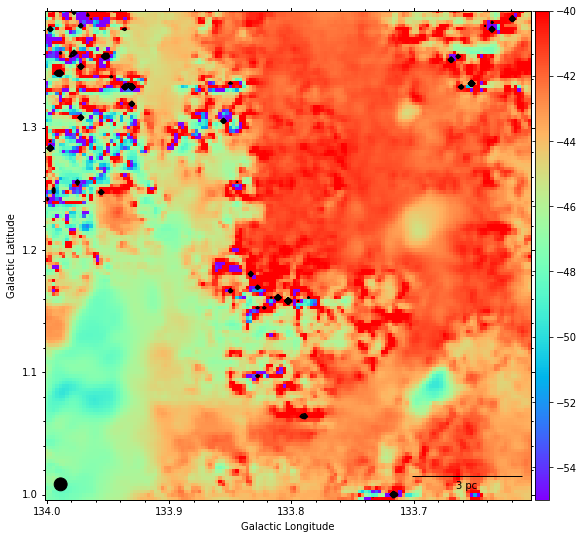

In [28]:
f = aplpy.FITSFigure(mom1.hdu)
f.show_colorscale(vmax=-40, vmin=-55, cmap='rainbow')
# 軸の表記を変換
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')